<a href="https://colab.research.google.com/github/Phuvanenthran-P/Projects/blob/main/Real_Time_Stock_Market_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real-Time Stock Market Dashboard**

## **Project Overview**

The **Real-Time Stock Market Dashboard** fetches live stock market data, displays interactive visualizations, and includes trend analysis using Simple Moving Average (SMA) and Exponential Moving Average (EMA). The dashboard provides a clear view of stock price trends and allows users to explore data dynamically through visualizations.

## **Technologies Used**

* **Python:** Programming language for data processing and analysis.
* **Pandas:** Library for data manipulation and analysis.
* **Matplotlib:** Library for static visualizations.
* **Plotly:** Library for interactive visualizations.
* **Google Colab:** Cloud-based Jupyter notebook for executing code.

## **Features**

* **Live Stock Price Updates:** Fetches real-time stock market data and updates live stock prices.
* **SMA & EMA Trend Analysis:** Displays trend analysis using Simple Moving Average (SMA) and Exponential Moving Average (EMA) to identify stock price trends.
* **Interactive Data Visualization:** Allows dynamic exploration of stock data through interactive plots.


## **Setup and Installation**

To run the project, you will need to install the necessary libraries.
In Google Colab, these libraries can be installed using the following commands:



In [1]:
!pip install yfinance plotly


## **Data Collection**

The data is fetched using yfinance, a Python library that allows you to fetch stock market data from Yahoo Finance. You can specify the stock symbol (e.g., AAPL for Apple) and the time range for the data.

In [3]:
import yfinance as yf
import pandas as pd

# Fetch data for a specific stock (e.g., Apple)
stock = yf.Ticker('AAPL')

# Get historical market data
df = stock.history(period="1d", interval="1m")  # 1-minute interval for live updates
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-01-29 09:30:00-05:00,234.149994,235.369904,234.009995,235.000000,3768934,0.0,0.0
2025-01-29 09:31:00-05:00,234.979996,235.350006,234.520004,235.154999,292500,0.0,0.0
2025-01-29 09:32:00-05:00,235.154999,235.600006,234.720001,235.042007,308834,0.0,0.0
2025-01-29 09:33:00-05:00,235.009995,235.470001,234.940002,235.375000,206882,0.0,0.0
2025-01-29 09:34:00-05:00,235.360001,235.419998,234.875000,235.000000,309659,0.0,0.0


## **Data Cleaning and Preparation**

Data cleaning involves handling any missing values or outliers and preparing the data for trend analysis.

In [4]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values (if any)
df = df.dropna()

# Calculate SMA and EMA for trend analysis
df['SMA'] = df['Close'].rolling(window=50).mean()  # 50-period Simple Moving Average
df['EMA'] = df['Close'].ewm(span=50, adjust=False).mean()  # 50-period Exponential Moving Average


## **Trend Analysis with SMA and EMA**

We use **SMA** and **EMA** to analyze the stock price trends. SMA provides a simple moving average over a specified period, while EMA gives more weight to recent data points.

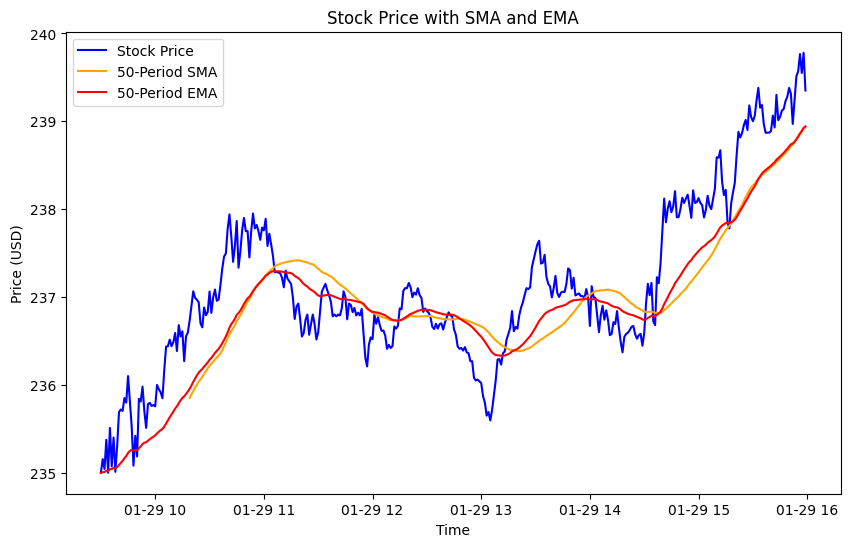

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the stock price, SMA, and EMA
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Stock Price', color='blue')
plt.plot(df['SMA'], label='50-Period SMA', color='orange')
plt.plot(df['EMA'], label='50-Period EMA', color='red')
plt.title('Stock Price with SMA and EMA')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.show()


## **Interactive Visualization**

Using **Plotly**, we can create an interactive visualization that allows the user to hover over data points, zoom in, and explore stock trends dynamically.

In [6]:
import plotly.graph_objects as go

# Create an interactive plot
fig = go.Figure()

# Add Stock Price trace
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Stock Price'))

# Add SMA trace
fig.add_trace(go.Scatter(x=df.index, y=df['SMA'], mode='lines', name='50-Period SMA'))

# Add EMA trace
fig.add_trace(go.Scatter(x=df.index, y=df['EMA'], mode='lines', name='50-Period EMA'))

# Add layout options
fig.update_layout(
    title='Real-Time Stock Price with SMA & EMA',
    xaxis_title='Time',
    yaxis_title='Price (USD)',
    template='plotly_dark'
)

# Show the interactive plot
fig.show()


## **Real-Time Stock Price Updates**

To update the stock prices in real-time, we can set up a loop that fetches the latest data at regular intervals (e.g., every minute). This feature can be implemented using time.sleep() for periodic updates.

In [ ]:
import time

# Fetch and update stock data every minute
while True:
    df = stock.history(period="1d", interval="1m")  # Get new data
    df['SMA'] = df['Close'].rolling(window=50).mean()  # Recalculate SMA
    df['EMA'] = df['Close'].ewm(span=50, adjust=False).mean()  # Recalculate EMA

    # Update the interactive plot
    fig.data[0].y = df['Close']
    fig.data[1].y = df['SMA']
    fig.data[2].y = df['EMA']

    # Redraw the figure
    fig.show()

    # Wait for a minute before updating again
    time.sleep(60)  # Sleep for 60 seconds


## **Conclusion**

This **Real-Time Stock Market Dashboard** provides an interactive way to explore stock price trends and analyze market behavior using SMA and EMA. It helps in understanding market dynamics, making it useful for traders and analysts.

The dashboard can be extended to support multiple stocks, customizable time intervals, and additional indicators like RSI, MACD, etc.

